<a href="https://colab.research.google.com/github/11kartheek/clip-sam/blob/main/clip_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip -q install torch torchvision transformers
!pip -q install open_clip_torch
!pip -q install datasets[vision]
!pip -q install gradio

In [32]:
import open_clip
import torch
import gradio as gr
from PIL import Image
from datasets import load_dataset
from datasets import load_from_disk

import random

# Load the fruits dataset
dataset = load_dataset("VinayHajare/Fruits-30")

Resolving data files:   0%|          | 0/827 [00:00<?, ?it/s]

In [33]:
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k')
model.eval()  # model in train mode by default, impacts some models with BatchNorm or stochastic depth active
tokenizer = open_clip.get_tokenizer('ViT-B-32')


In [34]:
dataset.save_to_disk("./fruits_dataset")

Saving the dataset (0/1 shards):   0%|          | 0/826 [00:00<?, ? examples/s]

In [35]:
from huggingface_hub import HfApi
api = HfApi()

In [36]:
from huggingface_hub import login
login()

In [37]:
# api.upload_folder(
#     folder_path="fruits_dataset",
#     repo_id="Kartheekb7/clip_classification",
#     repo_type="space",
# )

In [38]:
from datasets import load_from_disk
dataset = load_from_disk("./fruits_dataset/train/train")

In [39]:
dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 826
})

In [40]:
from collections import OrderedDict

FRUITS30_CLASSES = OrderedDict(
    {
           "0" : "acerolas",
           "1" : "apples",
           "2" : "apricots",
           "3" : "avocados",
           "4" : "bananas",
           "5" : "blackberries",
           "6" : "blueberries",
           "7" : "cantaloupes",
           "8" : "cherries",
           "9" : "coconuts",
           "10" : "figs",
           "11" : "grapefruits",
           "12" : "grapes",
           "13" : "guava",
           "14" : "kiwifruit",
           "15" : "lemons",
           "16" : "limes",
           "17" : "mangos",
           "18" : "olives",
           "19" : "oranges",
           "20" : "passionfruit",
           "21" : "peaches",
           "22" : "pears",
           "23" : "pineapples",
           "24" : "plums",
           "25" : "pomegranates",
           "26" : "raspberries",
           "27" : "strawberries",
           "28" : "tomatoes",
           "29" : "watermelons"
    }
)

In [41]:
labels = list(FRUITS30_CLASSES.values())

In [42]:


# Function to pick three random sets and shuffle labels
def prepare_game():
    # Pick 3 random indices
    indices = random.sample(range(len(dataset)), 1)

    # Get images and their corresponding labels
    selected_images = [dataset[i]['image'] for i in indices]

    return selected_images[0]



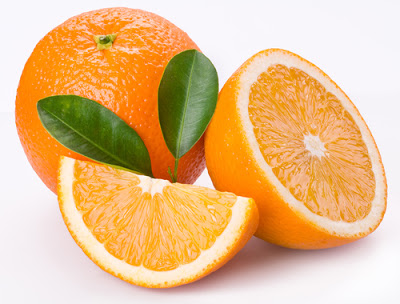

In [43]:
img = prepare_game()
img

In [ ]:
def on_submit(img1,label1):
        image = preprocess(img1).unsqueeze(0)
        text = tokenizer(labels+[label1,"not a fruit"])

        with torch.no_grad(), torch.cuda.amp.autocast():
            image_features = model.encode_image(image)
            text_features = model.encode_text(text)
            image_features /= image_features.norm(dim=-1, keepdim=True)
            text_features /= text_features.norm(dim=-1, keepdim=True)

            text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
        correct_label = FRUITS30_CLASSES[str(text_probs.argmax().item())]
        return correct_label

In [ ]:
on_submit(img,'dog')

/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


'raspberries'

In [44]:
def create_interface():
    # Store current correct labels in a mutable container
    current_correct_labels = []

    def get_image():
        indices = random.sample(range(len(dataset)), 1)
        selected_images = [dataset[i]['image'] for i in indices]
        return selected_images[0]

    def on_submit(img1,label1):
        image = preprocess(img1).unsqueeze(0)
        text = tokenizer(labels+[label1,"not a fruit"])

        with torch.no_grad(), torch.cuda.amp.autocast():
            image_features = model.encode_image(image)
            text_features = model.encode_text(text)
            image_features /= image_features.norm(dim=-1, keepdim=True)
            text_features /= text_features.norm(dim=-1, keepdim=True)

            text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
        correct_label = FRUITS30_CLASSES[str(text_probs.argmax().item())]
        return correct_label

    with gr.Blocks() as demo:
        # Create components
        with gr.Row():
          img1 = gr.Image(type="pil", label="Fruit",height = 400,width = 400)
        with gr.Row():
          label1 = gr.Textbox(label="Name this fruit")

        submit_btn = gr.Button("Submit")
        refresh_btn = gr.Button("Refresh")

        result = gr.Textbox(label="Answer")

        # Update images, labels, and correct labels on refresh button click
        refresh_btn.click(
            fn=get_image,
            outputs=[img1]
        )


        # Evaluate user input on submit button click
        submit_btn.click(
            fn=on_submit,
            inputs=[img1,label1],
            outputs=result
        )

    demo.launch()

# Run the game
create_interface()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7ad0d950af65ad0923.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [47]:
import open_clip
import torch
import gradio as gr
from PIL import Image
from datasets import load_dataset
import random
from datasets import load_from_disk
dataset = load_from_disk("./fruits_dataset/train/train")
from collections import OrderedDict
FRUITS30_CLASSES = OrderedDict(
    {
           "0" : "acerolas",
           "1" : "apples",
           "2" : "apricots",
           "3" : "avocados",
           "4" : "bananas",
           "5" : "blackberries",
           "6" : "blueberries",
           "7" : "cantaloupes",
           "8" : "cherries",
           "9" : "coconuts",
           "10" : "figs",
           "11" : "grapefruits",
           "12" : "grapes",
           "13" : "guava",
           "14" : "kiwifruit",
           "15" : "lemons",
           "16" : "limes",
           "17" : "mangos",
           "18" : "olives",
           "19" : "oranges",
           "20" : "passionfruit",
           "21" : "peaches",
           "22" : "pears",
           "23" : "pineapples",
           "24" : "plums",
           "25" : "pomegranates",
           "26" : "raspberries",
           "27" : "strawberries",
           "28" : "tomatoes",
           "29" : "watermelons"
    }
)
labels = list(FRUITS30_CLASSES.values())
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k')
model.eval()  # model in train mode by default, impacts some models with BatchNorm or stochastic depth active
tokenizer = open_clip.get_tokenizer('ViT-B-32')

def create_interface():
    # Store current correct labels in a mutable container
    current_correct_labels = []
    def get_image():
        indices = random.sample(range(len(dataset)), 1)
        selected_images = [dataset[i]['image'] for i in indices]
        return selected_images[0]

    def on_submit(img1,label1):
        image = preprocess(img1).unsqueeze(0)
        text = tokenizer(labels+[label1,"not a fruit"])

        with torch.no_grad():
            image_features = model.encode_image(image)
            text_features = model.encode_text(text)
            image_features /= image_features.norm(dim=-1, keepdim=True)
            text_features /= text_features.norm(dim=-1, keepdim=True)
            text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
        labels1 = labels+[label1,"not a fruit"]
        correct_label = labels1[(text_probs.argmax().item())]
        return correct_label

    with gr.Blocks() as demo:
        # Create components
        with gr.Row():
          img1 = gr.Image(type="pil", label="Fruit",height = 300,width = 300)
          label1 = gr.Textbox(label="Name this fruit")

        submit_btn = gr.Button("Submit")
        refresh_btn = gr.Button("Refresh")

        result = gr.Textbox(label="Answer")

        # Update images, labels, and correct labels on refresh button click
        refresh_btn.click(
            fn=get_image,
            outputs=[img1]
        )
        # Evaluate user input on submit button click
        submit_btn.click(
            fn=on_submit,
            inputs=[img1,label1],
            outputs=result
        )

    demo.launch(debug = True)

# Run the game
create_interface()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://5b3069914233d5d454.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7864 <> https://5b3069914233d5d454.gradio.live
